# Effect of AI on Customer Churn
## Predicting Customer Churn

### Import Libraries

In [58]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Import Dataset

In [3]:
# import train and test files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
0,1,59,2,7,7,2,18,5,2,1
1,2,49,2,6,5,1,3,2,0,0
2,3,35,2,3,3,3,8,2,1,1
3,4,63,2,3,3,2,6,6,2,1
4,5,28,4,6,6,1,11,3,-1,0


In [5]:
test.head()

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
0,1,59,1,2,3,1,11,5,-1,1
1,2,49,3,4,3,2,2,0,2,1
2,3,35,3,7,6,2,22,4,0,1
3,4,63,2,8,8,1,25,4,-1,1
4,5,28,4,5,5,2,14,1,1,1


### Data Exploration

#### Data dimensions, feature names and feature types

##### Training data

In [6]:
train.shape

(5000, 10)

In [7]:
train.columns

Index(['ID', 'Age', 'AI_Interaction_Level', 'Satisfaction_with_AI_Services',
       'AI_Personalization_Effectiveness', 'AI_Response_Time',
       'Overall_Usage_Frequency', 'Customer_Service_Interactions',
       'Change_in_Usage_Patterns', 'Customer_Churn'],
      dtype='object')

In [8]:
train.dtypes

ID                                  int64
Age                                 int64
AI_Interaction_Level                int64
Satisfaction_with_AI_Services       int64
AI_Personalization_Effectiveness    int64
AI_Response_Time                    int64
Overall_Usage_Frequency             int64
Customer_Service_Interactions       int64
Change_in_Usage_Patterns            int64
Customer_Churn                      int64
dtype: object

In [9]:
train['Customer_Churn'].value_counts(normalize=True)

Customer_Churn
0    0.5818
1    0.4182
Name: proportion, dtype: float64

In [10]:
train.describe(include='all')

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,42.575000,2.468800,5.51060,5.525800,1.981600,15.515000,5.066200,-0.005000,0.418200
std,1443.520003,12.554597,0.940853,2.86446,2.884129,0.815227,8.703018,3.178402,1.421049,0.493313
min,1.000000,21.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,-2.000000,0.000000
25%,1250.750000,32.000000,2.000000,3.00000,3.000000,1.000000,8.000000,2.000000,-1.000000,0.000000
50%,2500.500000,43.000000,2.000000,5.00000,5.000000,2.000000,16.000000,5.000000,0.000000,0.000000
75%,3750.250000,53.000000,3.000000,8.00000,8.000000,3.000000,23.000000,8.000000,1.000000,1.000000
max,5000.000000,64.000000,4.000000,10.00000,10.000000,3.000000,30.000000,10.000000,2.000000,1.000000


In [28]:
train.isnull().sum() # no missing values

ID                                  0
Age                                 0
AI_Interaction_Level                0
Satisfaction_with_AI_Services       0
AI_Personalization_Effectiveness    0
AI_Response_Time                    0
Overall_Usage_Frequency             0
Customer_Service_Interactions       0
Change_in_Usage_Patterns            0
Customer_Churn                      0
dtype: int64

##### Test data

In [23]:
test.shape

(1250, 10)

In [24]:
test.columns

Index(['ID', 'Age', 'AI_Interaction_Level', 'Satisfaction_with_AI_Services',
       'AI_Personalization_Effectiveness', 'AI_Response_Time',
       'Overall_Usage_Frequency', 'Customer_Service_Interactions',
       'Change_in_Usage_Patterns', 'Customer_Churn'],
      dtype='object')

In [25]:
test.describe(include='all')

,ID,Age,AI_Interaction_Level,Satisfaction_with_AI_Services,AI_Personalization_Effectiveness,AI_Response_Time,Overall_Usage_Frequency,Customer_Service_Interactions,Change_in_Usage_Patterns,Customer_Churn
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.0000,1250.000000
mean,625.500000,42.484000,2.464800,5.523200,5.521600,1.998400,15.598400,5.076800,0.0168,0.428800
std,360.988227,12.617048,0.949886,2.904929,2.921979,0.823006,8.650051,3.199108,1.4402,0.495103
min,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.0000,0.000000
25%,313.250000,31.000000,2.000000,3.000000,3.000000,1.000000,8.000000,2.000000,-1.0000,0.000000
50%,625.500000,43.000000,2.000000,6.000000,6.000000,2.000000,16.000000,5.000000,0.0000,0.000000
75%,937.750000,53.000000,3.000000,8.000000,8.000000,3.000000,23.000000,8.000000,1.0000,1.000000
max,1250.000000,64.000000,4.000000,10.000000,10.000000,3.000000,30.000000,10.000000,2.0000,1.000000


In [30]:
test.isnull().sum() # no missing data

ID                                  0
Age                                 0
AI_Interaction_Level                0
Satisfaction_with_AI_Services       0
AI_Personalization_Effectiveness    0
AI_Response_Time                    0
Overall_Usage_Frequency             0
Customer_Service_Interactions       0
Change_in_Usage_Patterns            0
Customer_Churn                      0
dtype: int64

### Data Wrangling and Visualization

<Axes: >

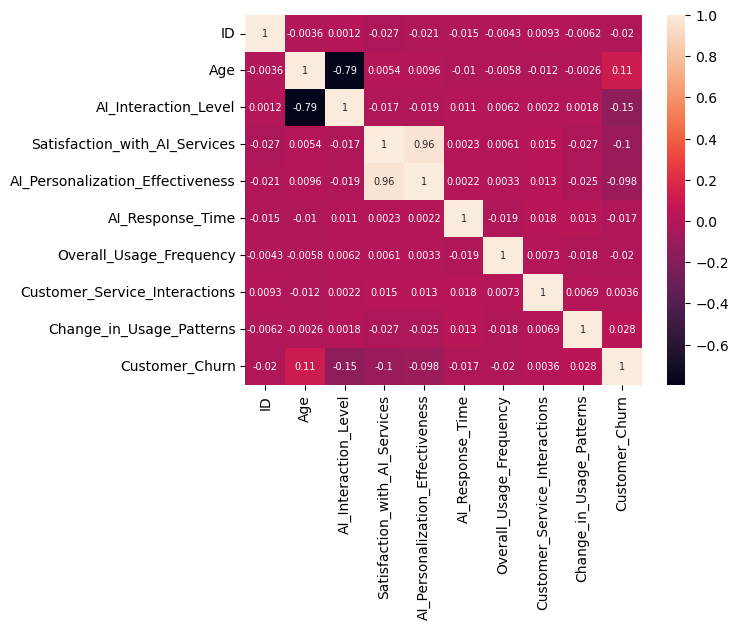

In [15]:
# create heat map of all variables
sns.heatmap(train.corr(), annot=True, annot_kws={"fontsize":7})

Observe a negative, high correlation between `Age` and `AI_Interaction_Level`, and a positive high correlation between`AI_Personalization_Effectiveness` and `Satisfaction_with_AI_Services`.

In [39]:
print(train['AI_Personalization_Effectiveness'].describe())
print(train['Satisfaction_with_AI_Services'].describe())

count    5000.000000
mean        5.525800
std         2.884129
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: AI_Personalization_Effectiveness, dtype: float64
count    5000.00000
mean        5.51060
std         2.86446
min         1.00000
25%         3.00000
50%         5.00000
75%         8.00000
max        10.00000
Name: Satisfaction_with_AI_Services, dtype: float64


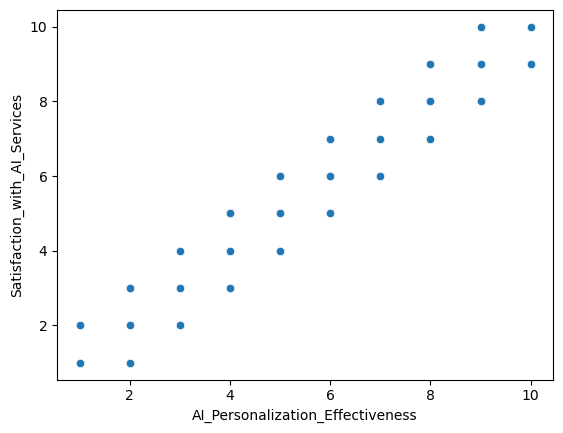

In [49]:
# create scatterplot of AI_Personalization_Effectiveness vs Satisfaction_with_AI_Services
ax = sns.scatterplot(x='AI_Personalization_Effectiveness', y='Satisfaction_with_AI_Services', data=train)


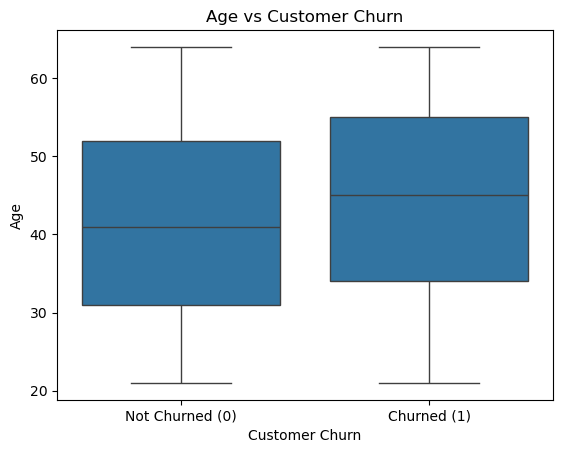

In [57]:
# Customer Churn vs Age
sns.boxplot(x='Customer_Churn', y='Age', data=train)
plt.title("Age vs Customer Churn")
plt.xlabel("Customer Churn")
plt.xticks(ticks=[0,1], labels=["Not Churned (0)", "Churned (1)"])
plt.show()

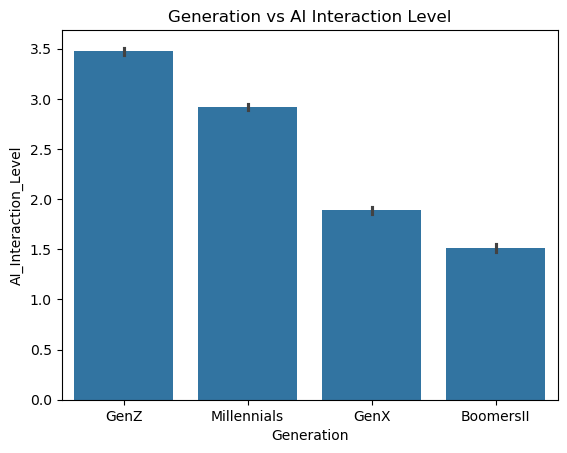

In [33]:
# create Generation feature
# Age ranges from 21-65 years
# GenZ: 12-27
# Millennials: 28-43
# GenX: 44-59
# Boomers II: 60-69

bins = [19, 27, 43, 59, 69]
labels = ['GenZ', 'Millennials', 'GenX', 'BoomersII']
train['Generation'] = pd.cut(train['Age'], bins, labels=labels)

# plot bar plot of Generation vs AI_Interaction_Level
sns.barplot(x='Generation', y='AI_Interaction_Level', data=train)
plt.title("Generation vs AI Interaction Level")
plt.show()

### Evaluate Model function

In [ ]:
# print classification report and accuracy

def print_classification_report(y_true, y_pred):
    print("Classification Report:")
    classification_report(y_true, y_pred)
    acc_model = accuracy_score(y_true, y_pred)
    print("Accuracy Score:" + acc_model)

    return acc_model

In [ ]:
# plot confusion matrix for model

def print_conf_matrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")